# Motivation

# Data Processing and Cleaning

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np
from sklearn.preprocessing import normalize, Normalizer


pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
andrew_audio = pd.read_csv('/content/drive/My Drive/data/andrew_audio.csv')
andrew_noaudio = pd.read_csv('/content/drive/My Drive/data/andrew_noaudio.csv')
kevin_audio = pd.read_csv('/content/drive/My Drive/data/kevin_audio.csv')
kevin_noaudio = pd.read_csv('/content/drive/My Drive/data/kevin_noaudio.csv')
richard_audio = pd.read_csv('/content/drive/My Drive/data/richard_audio.csv')
richard_noaudio = pd.read_csv('/content/drive/My Drive/data/richard_noaudio.csv')

In [ ]:
dfs = [andrew_audio, andrew_noaudio, kevin_audio, kevin_noaudio, richard_audio, richard_noaudio]

In [ ]:
for df in dfs:
    df.rename(columns = {'Unnamed: 0': 'clip'}, inplace = True)
    df.drop(columns = ['raw_value'], inplace = True)
    df.drop_duplicates(inplace = True)
    df['clip'] = df['clip'].str.replace('clip', '')
    df['clip'] = pd.to_numeric(df['clip'].astype(str))
    df.dropna(inplace = True)

In [ ]:
andrew_audio

,clip,attention,meditation,timestamp
0,1,0.0,0.0,3.639
1,1,0.0,0.0,3.640
2,1,0.0,0.0,3.641
4,1,0.0,0.0,3.642
6,1,0.0,0.0,3.643
...,...,...,...,...
120010,10,67.0,87.0,43.600
120012,10,67.0,87.0,43.601
120014,10,67.0,87.0,43.602
120017,10,67.0,87.0,43.603


# Data Analysis

In [ ]:
#Separate the data from each clip and add it into lists by the subject and presence of audio
kevin_audio_clips = [kevin_audio[kevin_audio['clip'] == i] for i in range(1,11)]
kevin_noaudio_clips = [kevin_noaudio[kevin_noaudio['clip'] == i] for i in range(1,11)]
#Instantiate list var to accept audio/no-audio combined and synchronized data
kevin = []
for i in range(10):
    # Create temporary Dataframes to take each audio and no-audio clip
    aud_temp = kevin_audio_clips[i]
    naud_temp = kevin_noaudio_clips[i]
    # Zero out and reset the indeces of these dataframes so we can adjust the clip timestamps
    aud_temp = aud_temp.reset_index()
    naud_temp = naud_temp.reset_index()
    # Synchronize the timestamps of the non-audio and audio clips by subtracting the difference from one DF
    aud_temp['timestamp'] -= aud_temp['timestamp'][0] - naud_temp['timestamp'][0]
    # Concatenate the lists with their keys so they can be graphed properly
    df = pd.concat([aud_temp, naud_temp], keys = ['audio', 'no audio'])
    df.index = df.index.droplevel(1)
    # Add them to the combined list
    kevin.append(df)

In [ ]:
#Separate the data from each clip and add it into lists by the subject and presence of audio
richard_audio_clips = [richard_audio[richard_audio['clip'] == i] for i in range(1,11)]
richard_noaudio_clips = [richard_noaudio[richard_noaudio['clip'] == i] for i in range(1,11)]
#Instantiate list var to accept audio/no-audio combined and synchronized data
richard = []
for i in range(10):
    # Create temporary Dataframes to take each audio and no-audio clip
    aud_temp = richard_audio_clips[i]
    naud_temp = richard_noaudio_clips[i]
    # Zero out and reset the indeces of these dataframes so we can adjust the clip timestamps
    aud_temp = aud_temp.reset_index()
    naud_temp = naud_temp.reset_index()
    print(aud_temp.shape)
    print(naud_temp.shape)
    # Synchronize the timestamps of the non-audio and audio clips by subtracting the difference from one DF
    aud_temp['timestamp'] -= aud_temp['timestamp'][0] - naud_temp['timestamp'][0]
    # Concatenate the lists with their keys so they can be graphed properly
    df = pd.concat([aud_temp, naud_temp], keys = ['audio', 'no audio'])
    df.index = df.index.droplevel(1)
    # Add them to the combined list
    richard.append(df)



(1716, 5)
(2980, 5)
(6161, 5)
(4964, 5)
(8986, 5)
(8287, 5)
(7593, 5)
(7479, 5)
(8413, 5)
(7174, 5)
(5005, 5)
(4466, 5)
(4773, 5)
(2624, 5)
(8156, 5)
(7222, 5)
(2000, 5)
(1976, 5)
(11475, 5)
(10462, 5)


In [ ]:

#Separate the data from each clip and add it into lists by the subject and presence of audio
andrew_audio_clips = [andrew_audio[andrew_audio['clip'] == i] for i in range(1,11)]
andrew_noaudio_clips = [andrew_noaudio[andrew_noaudio['clip'] == i] for i in range(1,11)]
#Instantiate list var to accept audio/no-audio combined and synchronized data
andrew = []
for i in range(10):
    # Create temporary Dataframes to take each audio and no-audio clip
    aud_temp = andrew_audio_clips[i]
    naud_temp = andrew_noaudio_clips[i]
    # Zero out and reset the indeces of these dataframes so we can adjust the clip timestamps
    aud_temp = aud_temp.reset_index()
    naud_temp = naud_temp.reset_index()
    # Synchronize the timestamps of the non-audio and audio clips by subtracting the difference from one DF
    aud_temp['timestamp'] -= aud_temp['timestamp'][0] - naud_temp['timestamp'][0]
    # Concatenate the lists with their keys so they can be graphed properly
    df = pd.concat([aud_temp, naud_temp], keys = ['audio', 'no audio'])
    df.index = df.index.droplevel(1)
    # Add them to the combined list
    andrew.append(df)

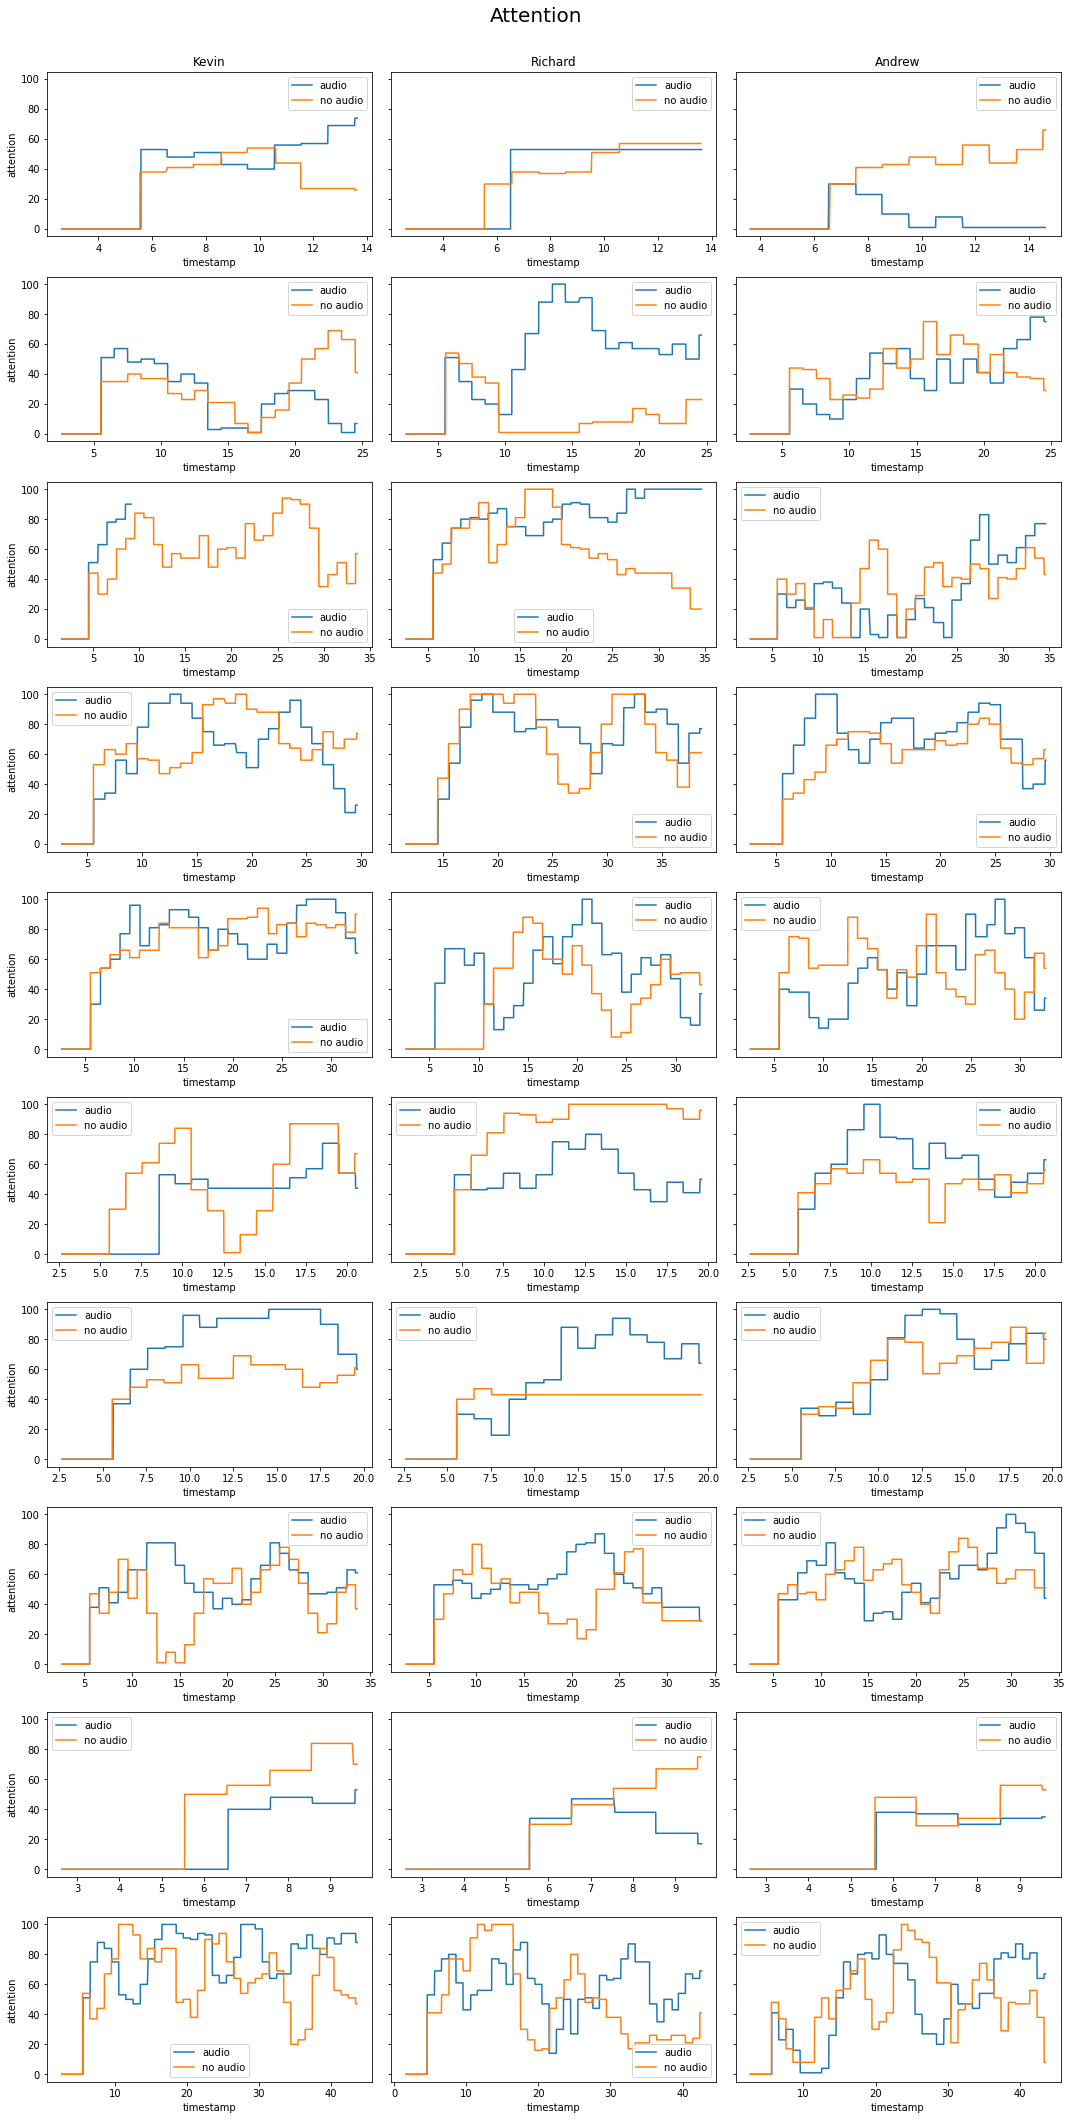

In [ ]:
# Establish a figure and its dimensions to display the graphs of the combined data
fig, axes = plt.subplots(10, 3, figsize=(15, 30), sharey=True)
# Graph all of the combined data for the 'Kevin' subject
axes[0][0].set_title('Kevin')
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[0].index, data = kevin[0], ax=axes[0][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[1].index, data = kevin[1], ax=axes[1][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[2].index, data = kevin[2], ax=axes[2][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[3].index, data = kevin[3], ax=axes[3][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[4].index, data = kevin[4], ax=axes[4][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[5].index, data = kevin[5], ax=axes[5][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[6].index, data = kevin[6], ax=axes[6][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[7].index, data = kevin[7], ax=axes[7][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[8].index, data = kevin[8], ax=axes[8][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = kevin[9].index, data = kevin[9], ax=axes[9][0])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[0].index, data = richard[0], ax=axes[0][1])
# Graph all of the combined data for the 'Richard' subject
axes[0][1].set_title('Richard')
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[1].index, data = richard[1], ax=axes[1][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[2].index, data = richard[2], ax=axes[2][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[3].index, data = richard[3], ax=axes[3][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[4].index, data = richard[4], ax=axes[4][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[5].index, data = richard[5], ax=axes[5][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[6].index, data = richard[6], ax=axes[6][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[7].index, data = richard[7], ax=axes[7][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[8].index, data = richard[8], ax=axes[8][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = richard[9].index, data = richard[9], ax=axes[9][1])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[0].index, data = andrew[0], ax=axes[0][2])
# Graph all of the combined data for the 'Andrew' subject
axes[0][2].set_title('Andrew')
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[1].index, data = andrew[1], ax=axes[1][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[2].index, data = andrew[2], ax=axes[2][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[3].index, data = andrew[3], ax=axes[3][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[4].index, data = andrew[4], ax=axes[4][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[5].index, data = andrew[5], ax=axes[5][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[6].index, data = andrew[6], ax=axes[6][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[7].index, data = andrew[7], ax=axes[7][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[8].index, data = andrew[8], ax=axes[8][2])
sns.lineplot(x = 'timestamp', y = 'attention', hue = andrew[9].index, data = andrew[9], ax=axes[9][2])
# Create and format the title
fig.suptitle('Attention',fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
None

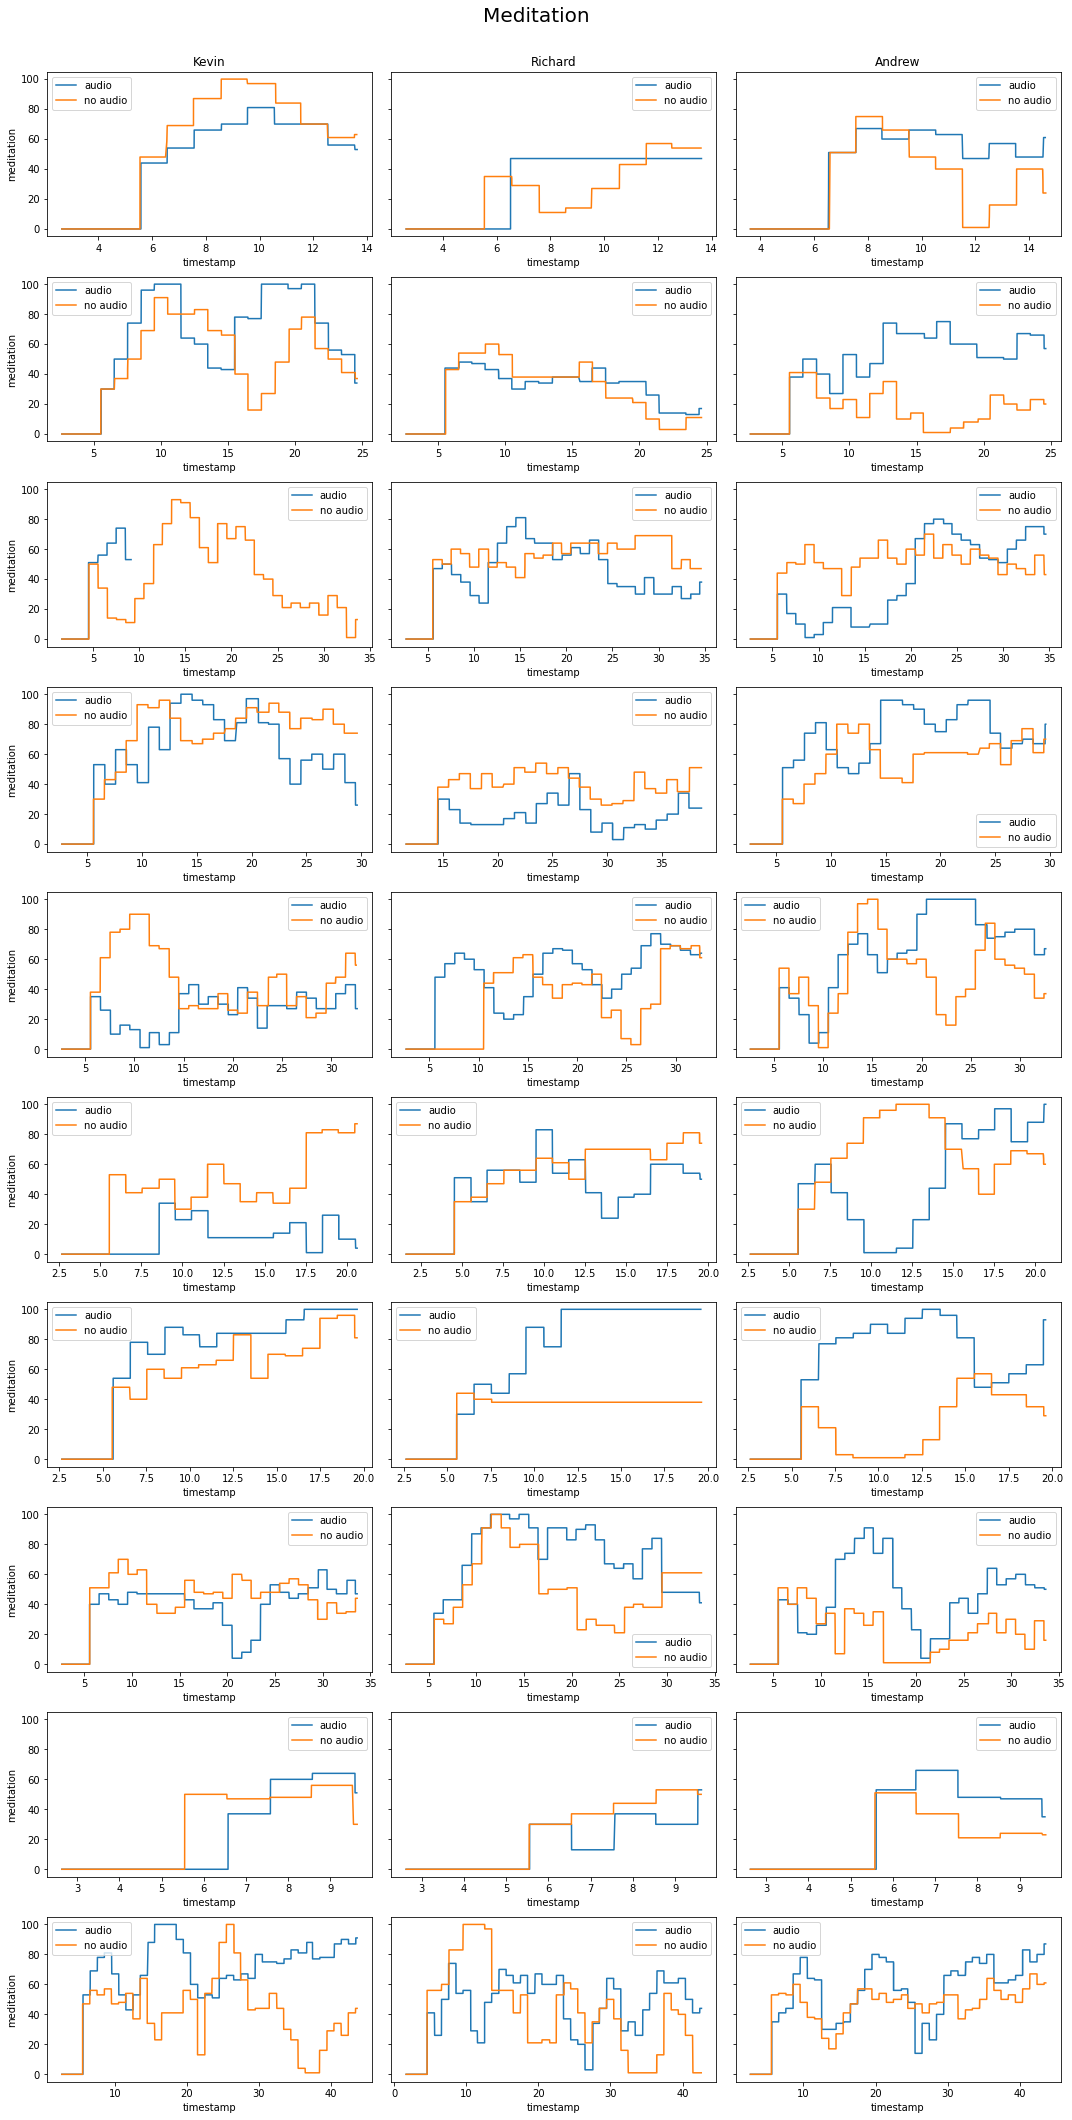

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(15, 30), sharey=True)
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[0].index, data = kevin[0], ax=axes[0][0])
axes[0][0].set_title('Kevin')
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[1].index, data = kevin[1], ax=axes[1][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[2].index, data = kevin[2], ax=axes[2][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[3].index, data = kevin[3], ax=axes[3][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[4].index, data = kevin[4], ax=axes[4][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[5].index, data = kevin[5], ax=axes[5][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[6].index, data = kevin[6], ax=axes[6][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[7].index, data = kevin[7], ax=axes[7][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[8].index, data = kevin[8], ax=axes[8][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = kevin[9].index, data = kevin[9], ax=axes[9][0])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[0].index, data = richard[0], ax=axes[0][1])
axes[0][1].set_title('Richard')
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[1].index, data = richard[1], ax=axes[1][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[2].index, data = richard[2], ax=axes[2][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[3].index, data = richard[3], ax=axes[3][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[4].index, data = richard[4], ax=axes[4][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[5].index, data = richard[5], ax=axes[5][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[6].index, data = richard[6], ax=axes[6][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[7].index, data = richard[7], ax=axes[7][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[8].index, data = richard[8], ax=axes[8][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = richard[9].index, data = richard[9], ax=axes[9][1])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[0].index, data = andrew[0], ax=axes[0][2])
axes[0][2].set_title('Andrew')
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[1].index, data = andrew[1], ax=axes[1][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[2].index, data = andrew[2], ax=axes[2][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[3].index, data = andrew[3], ax=axes[3][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[4].index, data = andrew[4], ax=axes[4][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[5].index, data = andrew[5], ax=axes[5][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[6].index, data = andrew[6], ax=axes[6][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[7].index, data = andrew[7], ax=axes[7][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[8].index, data = andrew[8], ax=axes[8][2])
sns.lineplot(x = 'timestamp', y = 'meditation', hue = andrew[9].index, data = andrew[9], ax=axes[9][2])
# Create and format the title
fig.suptitle('Meditation',fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
None

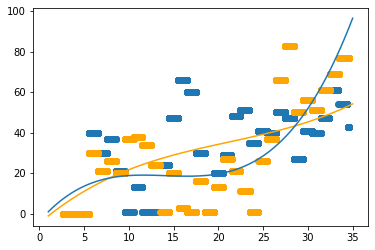

In [ ]:
audmodel = np.poly1d(np.polyfit(andrew_audio_clips[2]['timestamp'], andrew_audio_clips[2]['attention'], 3))
naudmodel = np.poly1d(np.polyfit(andrew_noaudio_clips[2]['timestamp'], andrew_noaudio_clips[2]['attention'], 3))
plt.scatter(andrew_noaudio_clips[2]['timestamp'], andrew_noaudio_clips[2]['attention'])
plt.scatter(andrew_audio_clips[2]['timestamp'], andrew_audio_clips[2]['attention'], c = 'orange')
myline = np.linspace(1, 35, 100)

plt.plot(myline, naudmodel(myline),c='orange')
plt.plot(myline, audmodel(myline))

No handles with labels found to put in legend.


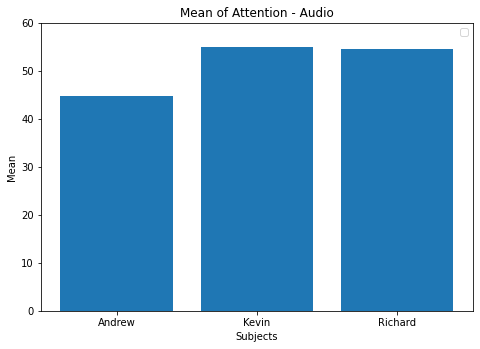

In [ ]:
andrew_audio_mean_attention = andrew_audio["attention"].mean()
kevin_audio_mean_attention = kevin_audio["attention"].mean()
richard_audio_mean_attention = richard_audio["attention"].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

subjects = ['Andrew', 'Kevin', 'Richard']
mean = [andrew_audio_mean_attention, kevin_audio_mean_attention, richard_audio_mean_attention]

ax.bar(subjects, mean)
plt.xlabel('Subjects')
plt.ylabel('Mean')
plt.legend()
plt.ylim(0,60)

plt.title('Mean of Attention - Audio')
plt.show()

No handles with labels found to put in legend.


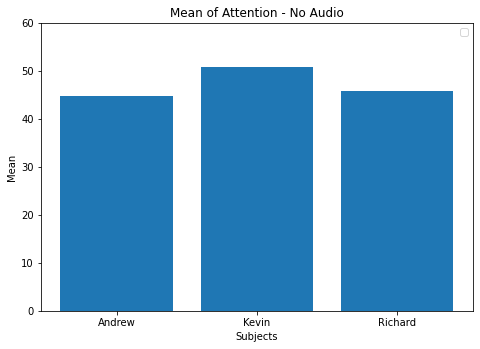

In [ ]:
andrew_audio_nomean_attention = andrew_noaudio["attention"].mean()
kevin_audio_nomean_attention = kevin_noaudio["attention"].mean()
richard_audio_nomean_attention = richard_noaudio["attention"].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

subjects = ['Andrew', 'Kevin', 'Richard']
mean = [andrew_audio_nomean_attention, kevin_audio_nomean_attention, richard_audio_nomean_attention]

ax.bar(subjects, mean)
plt.xlabel('Subjects')
plt.ylabel('Mean')
plt.legend()
plt.ylim(0,60)

plt.title('Mean of Attention - No Audio')
plt.show()

No handles with labels found to put in legend.


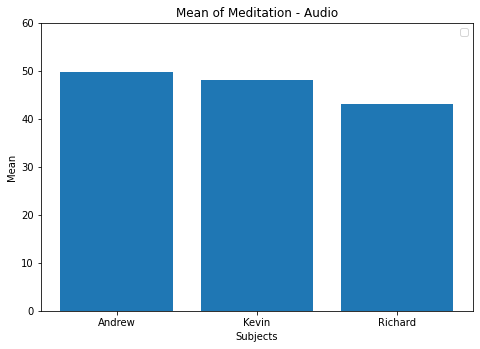

In [ ]:
andrew_audio_mean_meditation = andrew_audio["meditation"].mean()
kevin_audio_mean_meditation = kevin_audio["meditation"].mean()
richard_audio_mean_meditation = richard_audio["meditation"].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjects = ['Andrew', 'Kevin', 'Richard']
mean = [andrew_audio_mean_meditation, kevin_audio_mean_meditation, richard_audio_mean_meditation]
ax.bar(subjects, mean)
plt.xlabel('Subjects')
plt.ylabel('Mean')
plt.legend()

plt.ylim(0,60)

plt.title('Mean of Meditation - Audio')
plt.show()

No handles with labels found to put in legend.


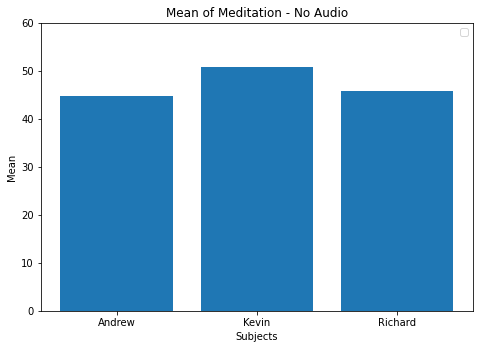

In [ ]:
andrew_noaudio_mean_attention = andrew_noaudio["attention"].mean()
kevin_noaudio_mean_attention = kevin_noaudio["attention"].mean()
richard_noaudio_mean_attention = richard_noaudio["attention"].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjects = ['Andrew', 'Kevin', 'Richard']
mean = [andrew_noaudio_mean_attention, kevin_noaudio_mean_attention, richard_noaudio_mean_attention]
ax.bar(subjects, mean)
plt.xlabel('Subjects')
plt.ylabel('Mean')
plt.legend()
plt.ylim(0,60)

plt.title('Mean of Meditation - No Audio')
plt.show()

#P-Values

In [ ]:
covariance = np.cov(richard_audio["meditation"].to_list(), richard_audio["attention"].to_list())
print (covariance)

[[765.254228   332.77991831]
 [332.77991831 824.37458907]]


No handles with labels found to put in legend.


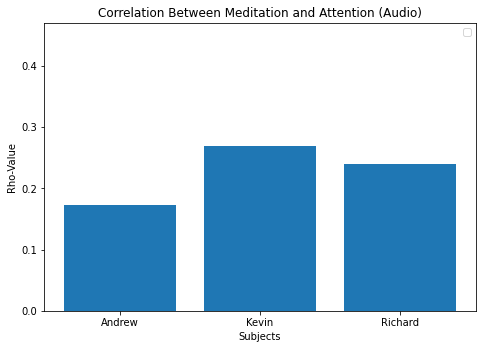

In [ ]:
richard_audio_meditation_pvalue = sc.pearsonr(normalize(richard_audio)[:,2],normalize(richard_audio)[:,1])[0]
andrew_audio_meditation_pvalue = sc.pearsonr(normalize(andrew_audio)[:,2],normalize(andrew_audio)[:,1])[0]
kevin_audio_meditation_pvalue = sc.pearsonr(normalize(kevin_audio)[:,2],normalize(kevin_audio)[:,1])[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjects = ['Andrew', 'Kevin', 'Richard']
pvalue = [andrew_audio_meditation_pvalue, kevin_audio_meditation_pvalue, richard_audio_meditation_pvalue]
ax.bar(subjects,pvalue)
plt.xlabel('Subjects')
plt.ylabel('Rho-Value')

plt.ylim(0,0.47)

plt.legend()
plt.title('Correlation Between Meditation and Attention (Audio)')
plt.show()


In [ ]:
richard_audio_attention_pvalue = abs(sc.pearsonr(richard_audio["attention"].to_list(), range(0, len(richard_audio.to_numpy())))[0])
andrew_audio_attention_pvalue = abs(sc.pearsonr(andrew_audio["attention"].to_list(), range(0, len(andrew_audio.to_numpy())))[0])
kevin_audio_attention_pvalue = abs(sc.pearsonr(kevin_audio["attention"].to_list(), range(0, len(kevin_audio.to_numpy())))[0])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjects = ['Andrew', 'Kevin', 'Richard']
pvalue = [andrew_audio_attention_pvalue, kevin_audio_attention_pvalue, richard_audio_attention_pvalue]
ax.bar(subjects,pvalue)
plt.xlabel('Subjects')
plt.ylabel('P-Value')
plt.ylim(0,.4)

plt.legend()
plt.title('P-Value of Attention - Audio')
plt.show()

No handles with labels found to put in legend.


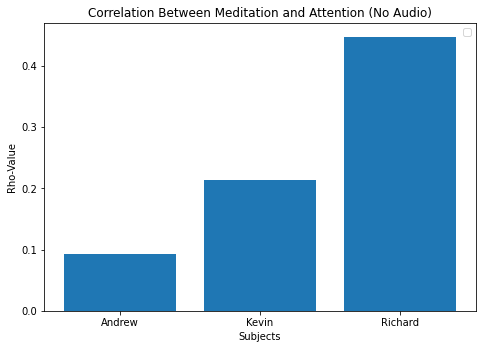

In [ ]:
richard_noaudio_meditation_pvalue = sc.pearsonr(normalize(richard_noaudio)[:,2],normalize(richard_noaudio)[:,1])[0]
andrew_noaudio_meditation_pvalue = sc.pearsonr(normalize(andrew_noaudio)[:,2],normalize(andrew_noaudio)[:,1])[0]
kevin_noaudio_meditation_pvalue = sc.pearsonr(normalize(kevin_noaudio)[:,2],normalize(kevin_noaudio)[:,1])[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjects = ['Andrew', 'Kevin', 'Richard']
pvalue = [andrew_noaudio_meditation_pvalue, kevin_noaudio_meditation_pvalue, richard_noaudio_meditation_pvalue]
ax.bar(subjects,pvalue)
plt.xlabel('Subjects')
plt.ylabel('Rho-Value')

plt.ylim(0,0.47)

plt.legend()
plt.title('Correlation Between Meditation and Attention (No Audio)')
plt.show()


In [ ]:
richard_noaudio_attention_pvalue = abs(sc.pearsonr(richard_noaudio["attention"].to_list(), range(0, len(richard_noaudio.to_numpy())))[0])
andrew_noaudio_attention_pvalue = abs(sc.pearsonr(andrew_noaudio["attention"].to_list(), range(0, len(andrew_noaudio.to_numpy())))[0])
kevin_noaudio_attention_pvalue = abs(sc.pearsonr(kevin_noaudio["attention"].to_list(), range(0, len(kevin_noaudio.to_numpy())))[0])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjects = ['Andrew', 'Kevin', 'Richard']
pvalue = [andrew_noaudio_meditation_pvalue, kevin_noaudio_meditation_pvalue, richard_noaudio_meditation_pvalue]
ax.bar(subjects,pvalue)
plt.xlabel('Subjects')
plt.ylabel('P-Value')
plt.ylim(0,.4)

plt.legend()
plt.title('P-Value of Attention - No Audio')
plt.show()